#### Karla Esther Escamilla Gachuz | Grupo 6AM1 | Estadística Avanzada


# **Proyecto Final Estadística Avanzada.** *Indicadores de salud sobre la diabetes, del CDC (Centros para el Control y Prevención de Enfermedades).*



---

### **Descripción.**
 ##### El conjunto de datos contiene estadísticas de atención médica e información de encuestas sobre el estilo de vida de las personas en general, junto con su diagnóstico de diabetes. Las 21 características consisten en algunos datos demográficos, resultados de análisis de laboratorio y respuestas a preguntas de la encuesta para cada paciente.

### **Resumen del contenido.**
 - Cada observación representa a un paciente.
 - Diagnóstico de diabetes
 - Datos demográficos (género)
 - Información personal (ingresos, educación)
 - Historial de salud (consumo de alcohol, tabaquismo, salud mental, salud física)

 ### Contamos con **253,680** observaciones

### **Objetivo.**
##### Comprender mejor la relación entre el estilo de vida y la diabetes en EE. UU.
 La variable objetivo para la clasificación es si un paciente:
 - Tiene diabetes. (Diabetes, 2)
 - Es prediabético. (Pre-diabetes, 1)
 - Está sano. (Healthy, 0)

*Se observa una simplificación más adelante:*
  - 0 = no diabetes, 1 = prediabetes or diabetes

### **Fuente.**
Con datos encontrados en [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators).

### **¿Cómo correr el código?**
Celda por celda desde el inicio.

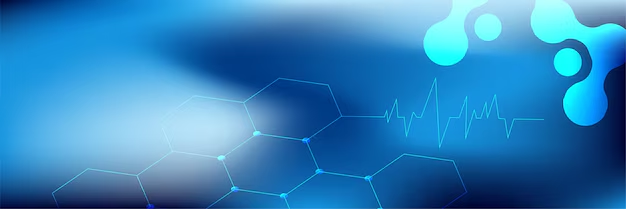

## **Parte 1. EDA y Preparación de los datos**

### a) Instalación del paquete

In [ ]:
install.packages("ucimlrepo")
library(ucimlrepo)

cdc_diabetes_health_indicators <- ucimlrepo::fetch_ucirepo(id = 891)

X <- cdc_diabetes_health_indicators$data$features
y <- cdc_diabetes_health_indicators$data$targets

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



### b) Observaciones primarias

In [ ]:
cdc_diabetes_health_indicators$variables

name,role,type,demographic,description,units,missing_values
<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>
ID,ID,Integer,NA,Patient ID,NA,no
Diabetes_binary,Target,Binary,NA,0 = no diabetes 1 = prediabetes or diabetes,NA,no
HighBP,Feature,Binary,NA,0 = no high BP 1 = high BP,NA,no
HighChol,Feature,Binary,NA,0 = no high cholesterol 1 = high cholesterol,NA,no
CholCheck,Feature,Binary,NA,0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years,NA,no
BMI,Feature,Integer,NA,Body Mass Index,NA,no
Smoker,Feature,Binary,NA,Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes,NA,no
Stroke,Feature,Binary,NA,(Ever told) you had a stroke. 0 = no 1 = yes,NA,no
HeartDiseaseorAttack,Feature,Binary,NA,coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes,NA,no


Observamos que:
- La variable 'Diabetes_binary' clasifica a los individuos en dos categorías: 0 para aquellos sin diabetes y 1 para quienes tienen prediabetes o diabetes, lo que permite una clasificación clara y binaria de la condición de salud.

- El Índice de Masa Corporal (IMC) es una variable crucial en este conjunto de datos, ya que se usa para evaluar el estado de peso y su relación con la diabetes y otros problemas de salud.

- No tenemos valores nulos.
- El id del paciente por default no será relevante.

**Número de Observaciones:**

In [ ]:
nrow(X)

[1] 253680

In [ ]:
X

HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,⋯,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,1,40,1,0,0,0,0,1,⋯,1,0,5,18,15,1,0,9,4,3
0,0,0,25,1,0,0,1,0,0,⋯,0,1,3,0,0,0,0,7,6,1
1,1,1,28,0,0,0,0,1,0,⋯,1,1,5,30,30,1,0,9,4,8
1,0,1,27,0,0,0,1,1,1,⋯,1,0,2,0,0,0,0,11,3,6
1,1,1,24,0,0,0,1,1,1,⋯,1,0,2,3,0,0,0,11,5,4
1,1,1,25,1,0,0,1,1,1,⋯,1,0,2,0,2,0,1,10,6,8
1,0,1,30,1,0,0,0,0,0,⋯,1,0,3,0,14,0,0,9,6,7
1,1,1,25,1,0,0,1,0,1,⋯,1,0,3,0,0,1,0,11,4,4
1,1,1,30,1,0,1,0,1,1,⋯,1,0,5,30,30,1,0,9,5,1


### c) Valores nulos

In [ ]:
# verificando valores nulos de todas formas
colSums(is.na(X))

HighBP             HighChol            CholCheck 
                   0                    0                    0 
                 BMI               Smoker               Stroke 
                   0                    0                    0 
HeartDiseaseorAttack         PhysActivity               Fruits 
                   0                    0                    0 
             Veggies    HvyAlcoholConsump        AnyHealthcare 
                   0                    0                    0 
         NoDocbcCost              GenHlth             MentHlth 
                   0                    0                    0 
            PhysHlth             DiffWalk                  Sex 
                   0                    0                    0 
                 Age            Education               Income 
                   0                    0                    0

### d) Resumen de las variables

In [ ]:
summary(X)

     HighBP         HighChol        CholCheck           BMI       
 Min.   :0.000   Min.   :0.0000   Min.   :0.0000   Min.   :12.00  
 1st Qu.:0.000   1st Qu.:0.0000   1st Qu.:1.0000   1st Qu.:24.00  
 Median :0.000   Median :0.0000   Median :1.0000   Median :27.00  
 Mean   :0.429   Mean   :0.4241   Mean   :0.9627   Mean   :28.38  
 3rd Qu.:1.000   3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:31.00  
 Max.   :1.000   Max.   :1.0000   Max.   :1.0000   Max.   :98.00  
     Smoker           Stroke        HeartDiseaseorAttack  PhysActivity   
 Min.   :0.0000   Min.   :0.00000   Min.   :0.00000      Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.00000   1st Qu.:0.00000      1st Qu.:1.0000  
 Median :0.0000   Median :0.00000   Median :0.00000      Median :1.0000  
 Mean   :0.4432   Mean   :0.04057   Mean   :0.09419      Mean   :0.7565  
 3rd Qu.:1.0000   3rd Qu.:0.00000   3rd Qu.:0.00000      3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :1.00000   Max.   :1.00000      Max.   :1.0000  
     Fruits  

## **Parte 2. Gráficos exploratorios**

### e) Histogramas

In [ ]:
# concatenando variables y target
data <- cbind(X, y)

Realizamos un tratamiento interesante sobre las variables para obtener una visualización específica sobre el comportamiento del IMC y la diabetes.

### **Distribución de los pacientes**

Separación del dataset por diagnóstico

In [ ]:
sin_diabetes <- data[data$Diabetes_binary == 0, ]

In [ ]:
con_diabetes <- data[data$Diabetes_binary == 1, ]

#### **IMC Con y Sin Diabetes**

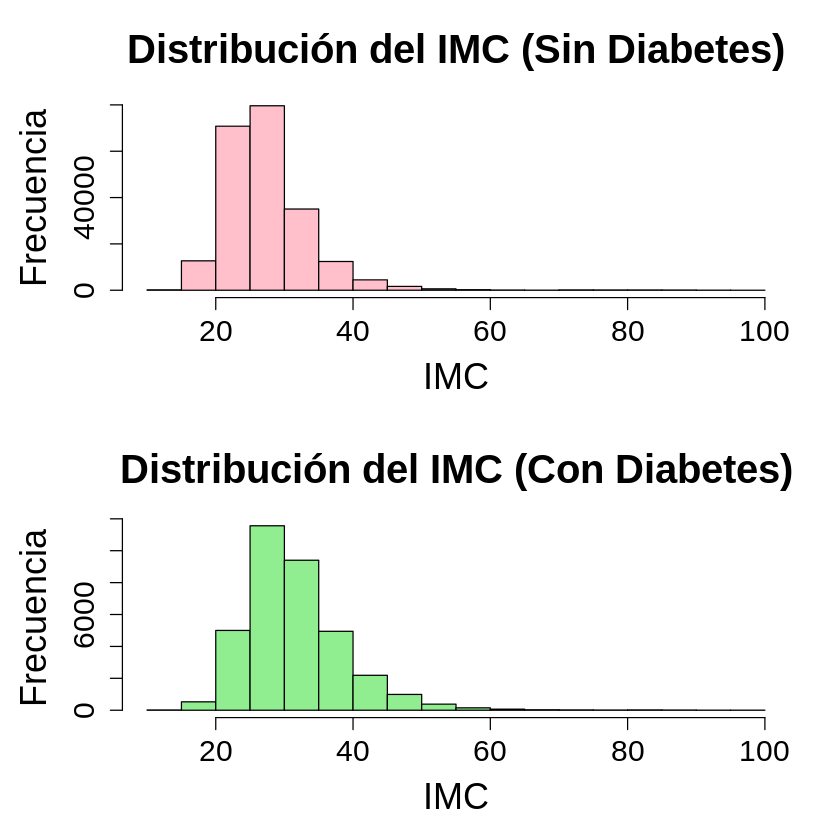

In [ ]:
par(mfrow=c(2, 1), mar=c(5, 5, 4, 2) + 0.1, cex.main=2, cex.lab=1.8, cex.axis=1.5)

hist(sin_diabetes$BMI, main="Distribución del IMC (Sin Diabetes)", xlab="IMC", ylab="Frecuencia", col="pink", cex.main=2, cex.lab=1.8, cex.axis=1.5)
hist(con_diabetes$BMI, main="Distribución del IMC (Con Diabetes)", xlab="IMC", ylab="Frecuencia", col="lightgreen")

Las personas con un IMC superior a 30 podrían tener Diabetes.

#### **Edad Con y Sin Diabetes**

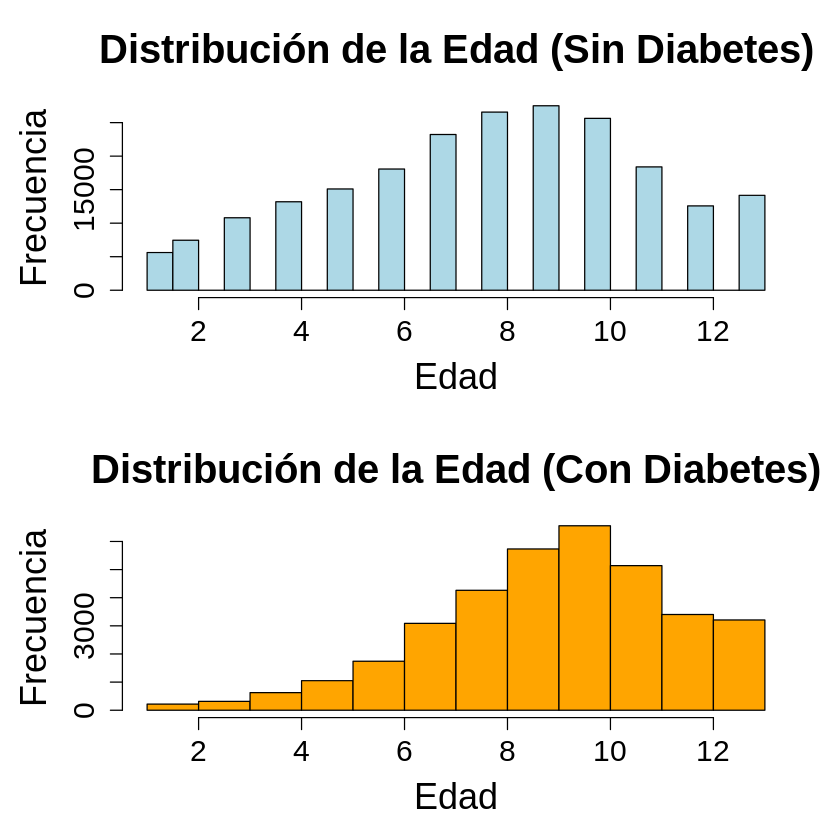

In [ ]:
par(mfrow=c(2, 1), mar=c(5, 5, 4, 2) + 0.1, cex.main=2, cex.lab=1.8, cex.axis=1.5)

hist(sin_diabetes$Age, main="Distribución de la Edad (Sin Diabetes)", xlab="Edad", ylab="Frecuencia", col="lightblue", cex.main=2, cex.lab=1.8, cex.axis=1.5)
hist(con_diabetes$Age, main="Distribución de la Edad (Con Diabetes)", xlab="Edad", ylab="Frecuencia", col="orange")

Los pacientes más jóvenes tienden a no ser diabéticos. La cuesta sube a partir de los 40 y hasta los 70 aÑos aproximadamente.

#### **Género Con y Sin Diabetes**

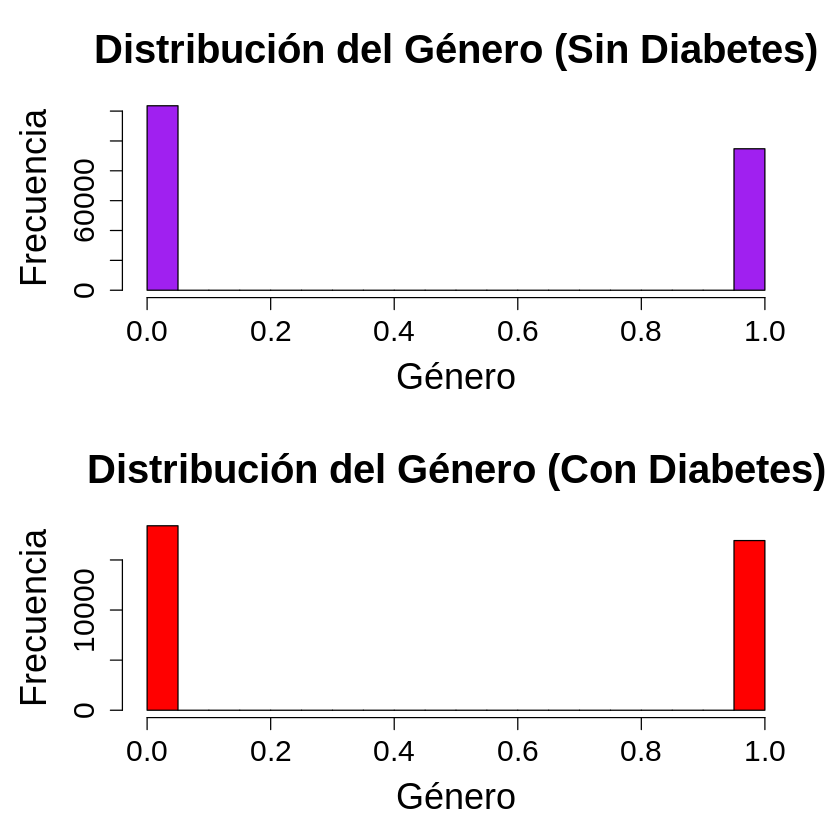

In [ ]:
par(mfrow=c(2, 1), mar=c(5, 5, 4, 2) + 0.1, cex.main=2, cex.lab=1.8, cex.axis=1.5)

hist(sin_diabetes$Sex, main="Distribución del Género (Sin Diabetes)", xlab="Género", ylab="Frecuencia", col="purple", cex.main=2, cex.lab=1.8, cex.axis=1.5)
hist(con_diabetes$Sex, main="Distribución del Género (Con Diabetes)", xlab="Género", ylab="Frecuencia", col="red")

Hay una cantidad superior de mujeres sobre los hombres sin diabetes entre los pacientes. Esta diferencia se suaviza en los diagnósticos de diabetes.

¿Cuántos hombres y mujeres hay?

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



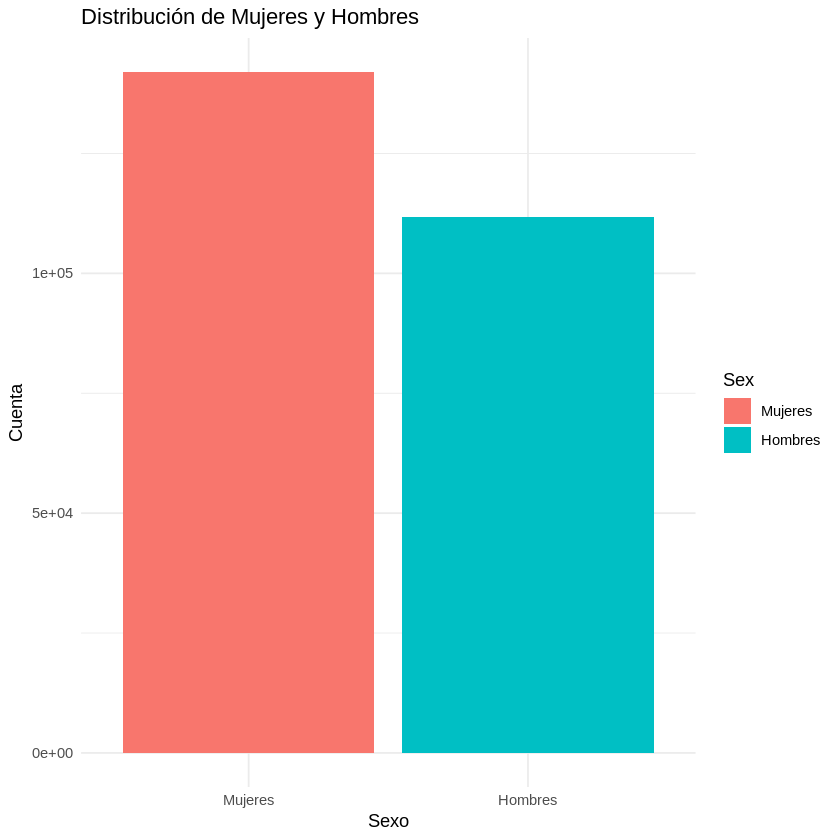

In [ ]:
install.packages("ggplot2")
library(ggplot2)

sex_counts <- data.frame(table(data$Sex))
colnames(sex_counts) <- c("Sex", "Count")

sex_counts$Sex <- factor(sex_counts$Sex, levels = c(0, 1), labels = c("Mujeres", "Hombres"))

ggplot(sex_counts, aes(x = Sex, y = Count, fill = Sex)) +
  geom_bar(stat = "identity") +
  labs(title = "Distribución de Mujeres y Hombres", x = "Sexo", y = "Cuenta") +
  theme_minimal()


In [ ]:
s <-table(data$Sex)

p <- prop.table(s)
p


        0         1 
0.5596578 0.4403422 

Hay una ligera proporción más grande de mujeres en el dataset, lo que puede estar influyendo en las proporciones por género, aunque sí se puede considerar representativa.

#### **Salud Mental Con y Sin Diabetes**


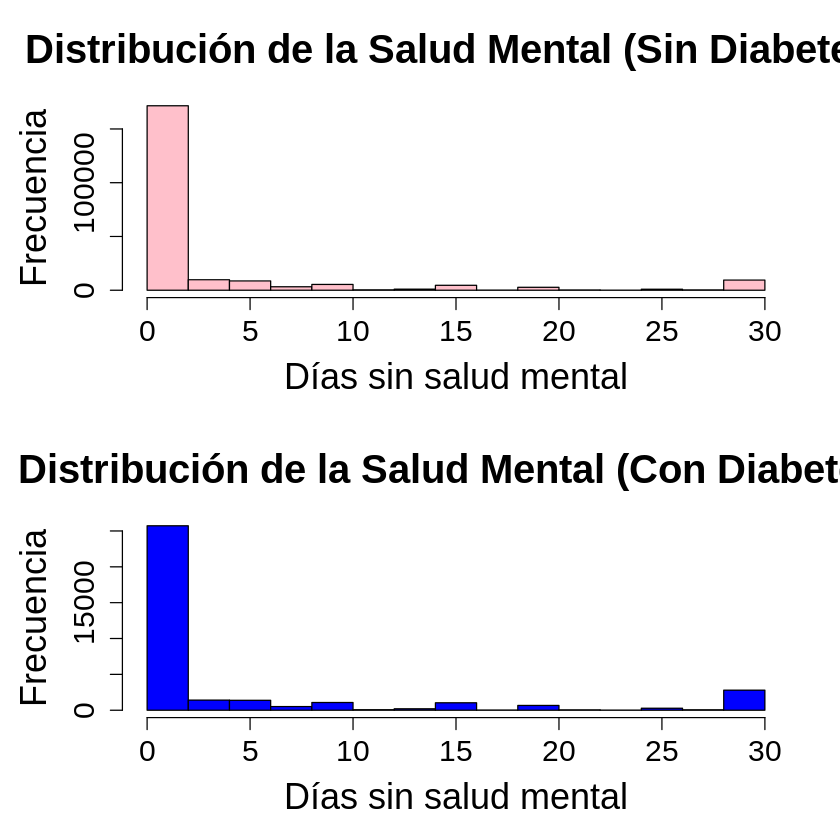

In [ ]:
par(mfrow=c(2, 1), mar=c(5, 5, 4, 2) + 0.1, cex.main=2, cex.lab=1.8, cex.axis=1.5)

hist(sin_diabetes$MentHlth, main="Distribución de la Salud Mental (Sin Diabetes)", xlab="Días sin salud mental", ylab="Frecuencia", col="pink", cex.main=2, cex.lab=1.8, cex.axis=1.5)
hist(con_diabetes$MentHlth, main="Distribución de la Salud Mental (Con Diabetes)", xlab="Días sin salud mental", ylab="Frecuencia", col="blue")

La salud mental no parece tener influencia relevante en los pacientes con o sin Diabetes.

#### **Consume Vegetales Con y Sin Diabetes**

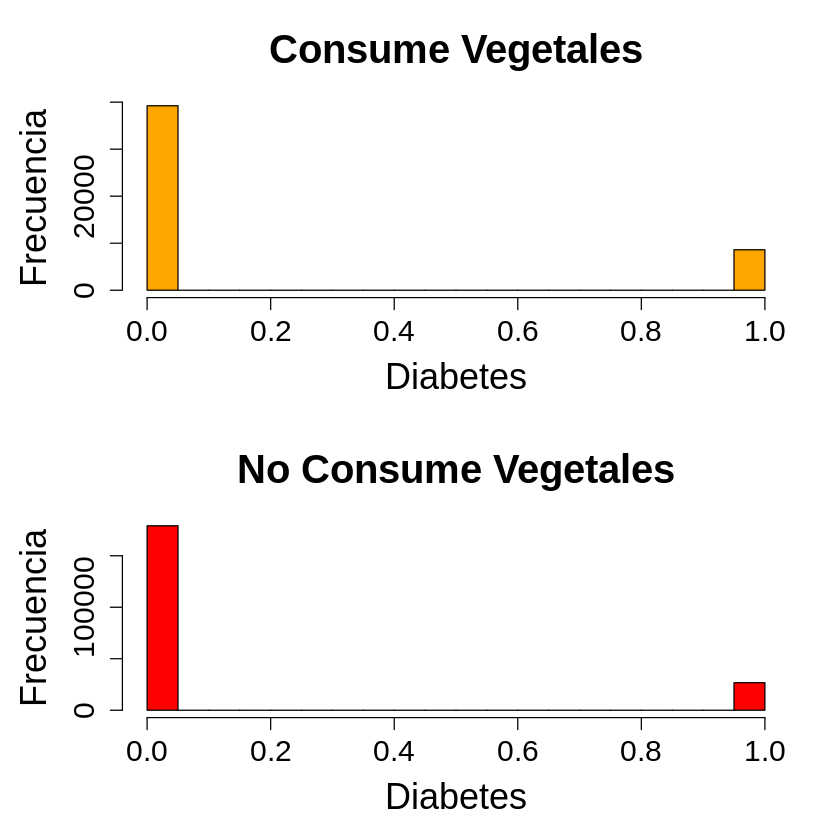

In [ ]:
vegg_si <- data[data$Veggies == 0, ]
vegg_no <- data[data$Veggies == 1, ]


par(mfrow=c(2, 1), mar=c(5, 5, 4, 2) + 0.1, cex.main=2, cex.lab=1.8, cex.axis=1.5)

hist(vegg_si$Diabetes_binary, main="Consume Vegetales", xlab="Diabetes", ylab="Frecuencia", col="orange", cex.main=2, cex.lab=1.8, cex.axis=1.5)
hist(vegg_no$Diabetes_binary, main="No Consume Vegetales", xlab="Diabetes", ylab="Frecuencia", col="red")

La cantidad de personas que **no consumen vegetales** y tienen diabetes es 5 veces superior a las personas que consumen vegetales y son diabéticas. Consumir vegetales podría influir en la salud del paciente.

## **Parte 3. Gráficos de tratamiento**

### e) Gráfico de dispersión (IMC y Edad)

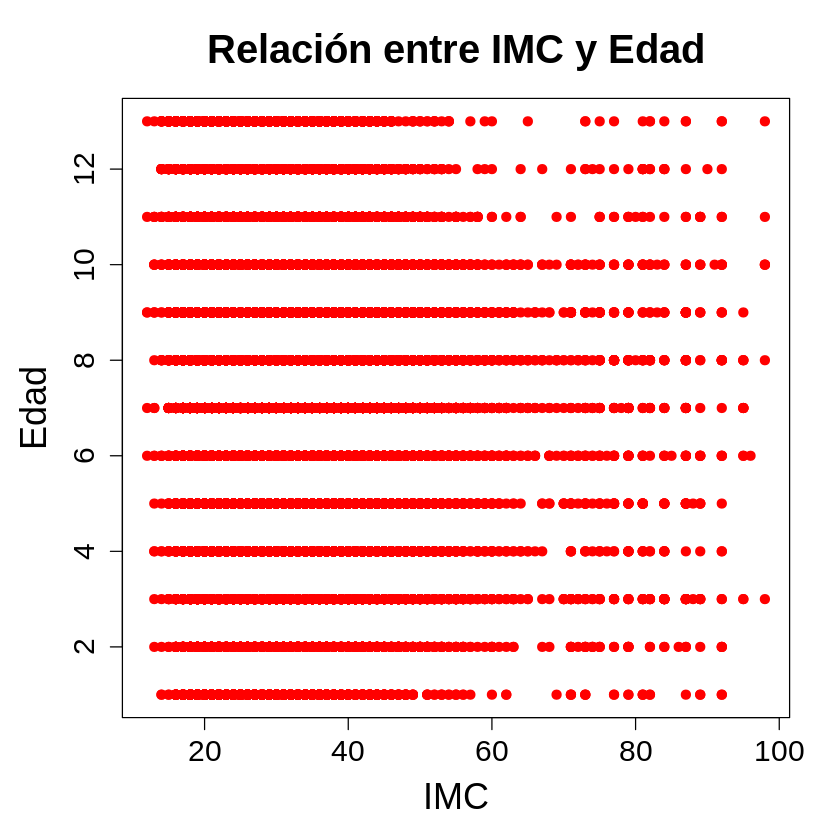

In [ ]:
par(mfrow=c(1, 1), mar=c(5, 5, 4, 2) + 0.1, cex.main=2, cex.lab=1.8, cex.axis=1.5)
plot(data$BMI, data$Age, main="Relación entre IMC y Edad", xlab="IMC", ylab="Edad", pch = 19, col = "red")


### f) Correlación con Heatmap

In [ ]:
install.packages("corrplot")
library(corrplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.95 loaded



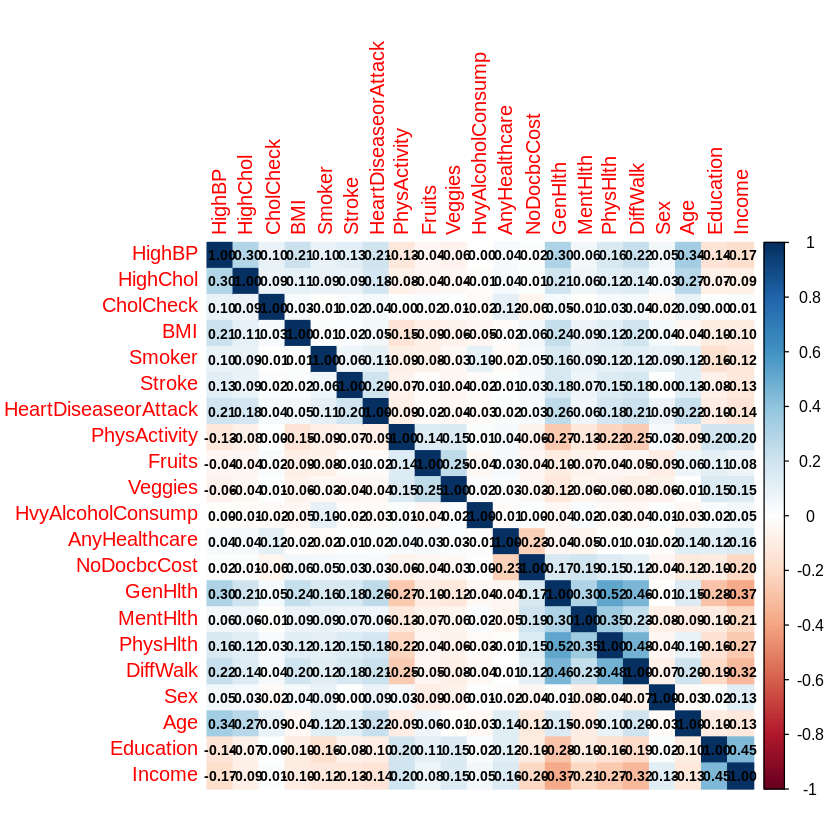

In [ ]:
corr_matrix <- cor(X[, sapply(X, is.numeric)], use="complete.obs")

# Crear una paleta de colores en gradiente de rosas
#col <- colorRampPalette(c("lightpink", "pink", "deeppink"))(200)

corrplot(corr_matrix, method="color", addCoef.col="black", number.cex=0.7)

### g) Visualización de Outliers (IMC x Diagnóstico)

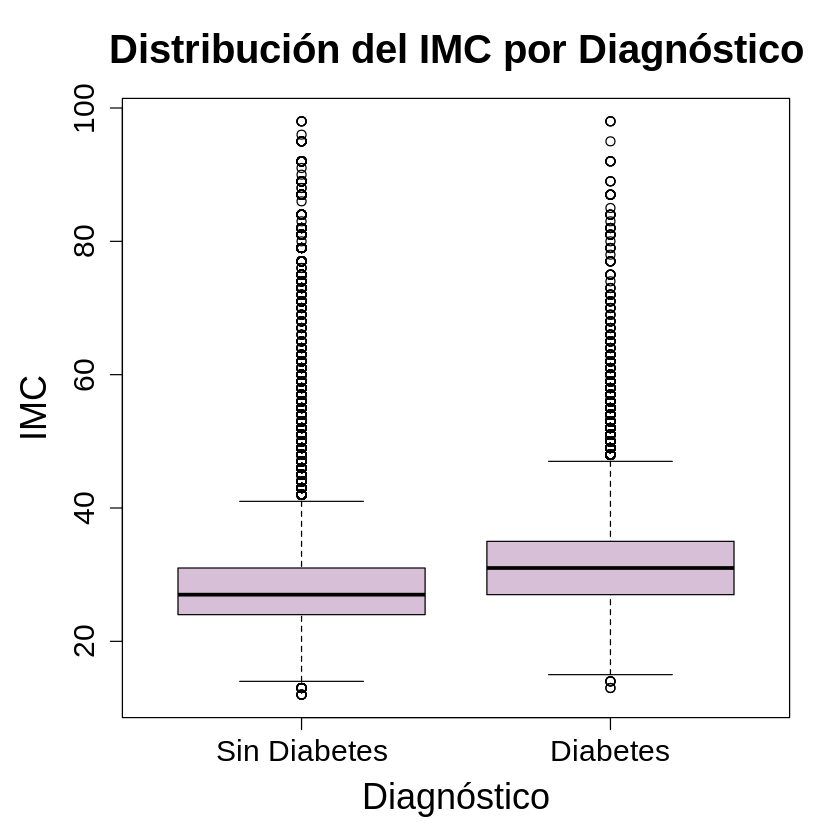

In [ ]:
par(mfrow=c(1, 1), mar=c(5, 5, 4, 2) + 0.1, cex.main=2, cex.lab=1.8, cex.axis=1.5)
boxplot(data$BMI ~ data$Diabetes_binary, main="Distribución del IMC por Diagnóstico", xlab="Diagnóstico", ylab="IMC", names=c("Sin Diabetes", "Diabetes"), col="thistle")

Los outliers pueden afectar las estadísticas descriptivas (media, desviación estándar) y los modelos predictivos, sesgando los resultados.

### h) Manejo de Outliers

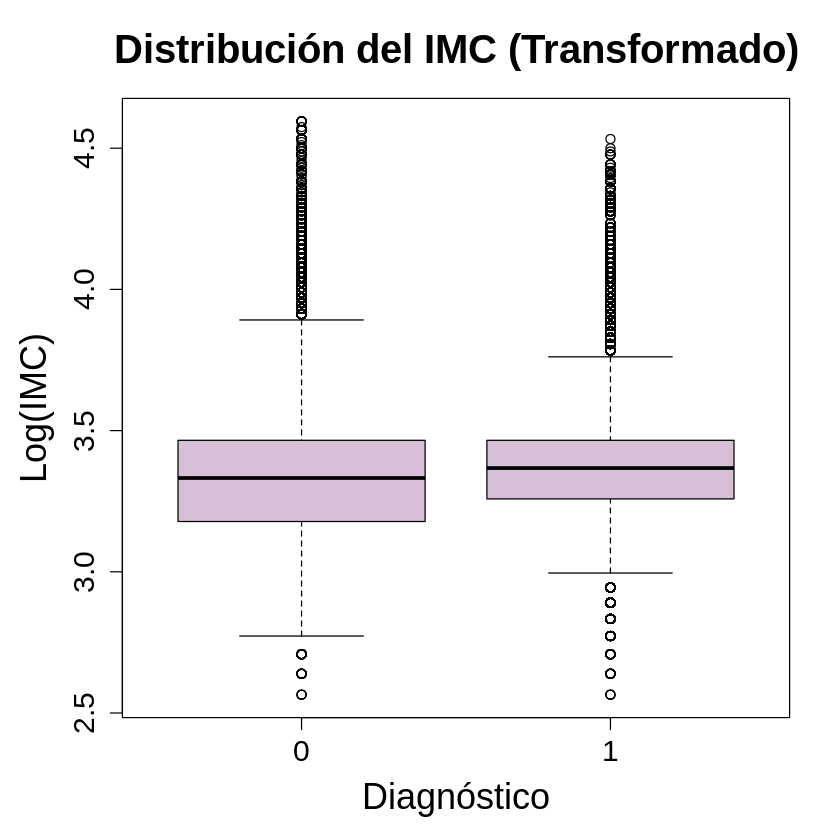

In [ ]:
# Aplicar transformación logarítmica
X$log_BMI <- log(X$BMI + 1)

# Nuevo boxplot con datos transformados
par(mfrow=c(1, 1), mar=c(5, 5, 4, 2) + 0.1, cex.main=2, cex.lab=1.8, cex.axis=1.5)
boxplot(X$log_BMI ~ X$Sex, main="Distribución del IMC (Transformado)", xlab="Diagnóstico", ylab="Log(IMC)", col="thistle")

## **Parte 4. PCA**

### Aplicación de PCA

In [ ]:
install.packages("stats")
install.packages("ggplot2")
library(stats)
library(ggplot2)

numeric_vars <- X[, sapply(X, is.numeric)]

pca_result <- princomp(numeric_vars, cor = TRUE)

summary(pca_result)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘stats’ is a base package, and should not be updated”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Importance of components:
                          Comp.1    Comp.2     Comp.3     Comp.4     Comp.5
Standard deviation     1.9155043 1.3587180 1.32751144 1.16127834 1.07609871
Proportion of Variance 0.1667799 0.0839143 0.08010394 0.06129852 0.05263584
Cumulative Proportion  0.1667799 0.2506942 0.33079810 0.39209662 0.44473245
                           Comp.6     Comp.7     Comp.8     Comp.9    Comp.10
Standard deviation     1.07066974 1.02421608 0.98297722 0.96123447 0.95608369
Proportion of Variance 0.05210608 0.04768266 0.04392019 0.04199871 0.04154982
Cumulative Proportion  0.49683853 0.54452119 0.58844139 0.63044010 0.67198992
                          Comp.11    Comp.12    Comp.13    Comp.14    Comp.15
Standard deviation     0.90775703 0.89099442 0.86658113 0.85654524 0.84743948
Proportion of Variance 0.03745558 0.03608505 0.03413468 0.03334862 0.03264335
Cumulative Proportion  0.70944550 0.74553055 0.77966522 0.81301385 0.84565720
                          Comp.16    Comp.17  

- Desviación Estándar: Representa cuánto varía cada componente de la media. Componentes con mayor desviación estándar capturan más varianza de los datos.

- Proporción de Varianza: Indica la cantidad de varianza explicada por cada componente individualmente. El primer componente (Comp.1) explica aproximadamente el 16.68% de la varianza total en los datos.

### Desviación estándar

In [ ]:
pca_result$sdev

Comp.1    Comp.2    Comp.3    Comp.4    Comp.5    Comp.6    Comp.7    Comp.8 
1.9155043 1.3587180 1.3275114 1.1612783 1.0760987 1.0706697 1.0242161 0.9829772 
   Comp.9   Comp.10   Comp.11   Comp.12   Comp.13   Comp.14   Comp.15   Comp.16 
0.9612345 0.9560837 0.9077570 0.8909944 0.8665811 0.8565452 0.8474395 0.8403036 
  Comp.17   Comp.18   Comp.19   Comp.20   Comp.21   Comp.22 
0.8163370 0.7529628 0.7191447 0.7037879 0.6506279 0.1423698

### Varianza explicada por cada componente

In [ ]:
pca_result$sdev^2 / sum(pca_result$sdev^2)

Comp.1       Comp.2       Comp.3       Comp.4       Comp.5       Comp.6 
0.1667798591 0.0839143025 0.0801039369 0.0612985179 0.0526358378 0.0521060765 
      Comp.7       Comp.8       Comp.9      Comp.10      Comp.11      Comp.12 
0.0476826630 0.0439201917 0.0419987138 0.0415498194 0.0374555829 0.0360850477 
     Comp.13      Comp.14      Comp.15      Comp.16      Comp.17      Comp.18 
0.0341346753 0.0333486245 0.0326433488 0.0320959157 0.0302911847 0.0257705920 
     Comp.19      Comp.20      Comp.21      Comp.22 
0.0235076895 0.0225144266 0.0192416682 0.0009213254

### Scree Plot para observar la varianza explicada por cada componente

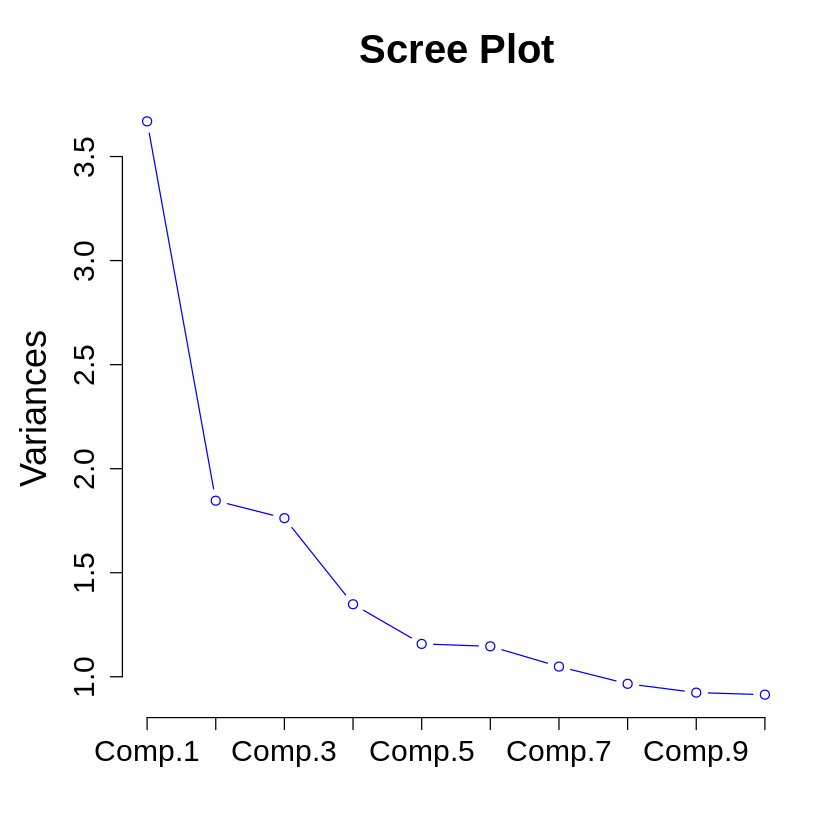

In [ ]:
par(mfrow=c(1, 1), mar=c(5, 5, 4, 2) + 0.1, cex.main=2, cex.lab=1.8, cex.axis=1.5)
screeplot(pca_result, type = "lines", main = "Scree Plot", col='blue')

Podríamos tomar los primeros 3 componentes principales más relevantes, que explican alrededor del 60-70% de la varianza, sin embargo, esta vez será más prudente utilizar los primeros 5, que explican el 85% de la varianza y proporcionan más confianza.

### Gráfico biplot de los dos primeros componentes

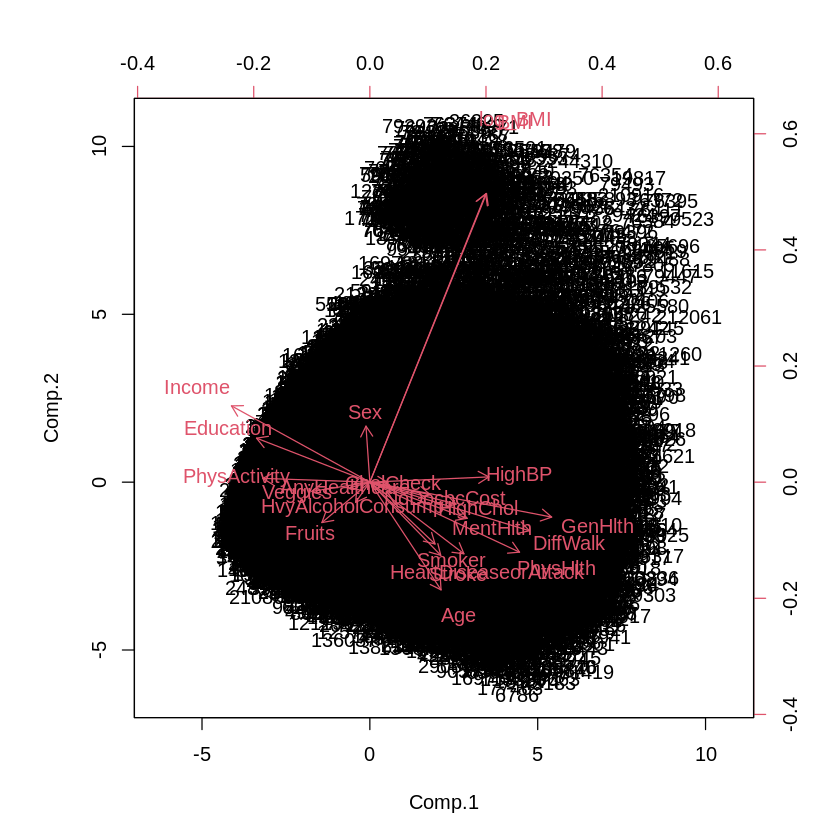

In [ ]:
biplot(pca_result, scale = 0)

### Scores de PCA

In [ ]:
pca_result$scores

Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6,Comp.7,Comp.8,Comp.9,Comp.10,⋯,Comp.13,Comp.14,Comp.15,Comp.16,Comp.17,Comp.18,Comp.19,Comp.20,Comp.21,Comp.22
5.14490201,0.90416239,-0.32030098,-0.70908296,0.02952806,-1.043759775,1.51297506,-0.26398768,-0.005385798,0.88246688,⋯,0.36968080,-1.07881077,0.587741344,-0.30472825,0.271044341,-0.166325503,0.55333302,0.029963201,-0.68519526,-0.0031004163
0.33695665,-0.74004366,-5.58186564,2.17401385,0.52214273,3.331794961,-1.28151164,-0.75838602,3.207993136,0.97663232,⋯,-0.85978430,2.05165517,-0.004150557,-1.91377339,0.058417364,-0.090594149,0.18778889,-1.719481907,-0.37772388,-0.0566678093
4.72551840,-1.23196263,-1.93638541,-2.08785054,-0.85310043,-1.732371604,-0.30204797,2.09969846,1.371866766,1.54050998,⋯,0.76372379,1.58353947,-1.248095374,1.46654388,0.267598666,0.138158191,-1.41285507,2.006489315,-0.31851150,-0.0631226320
-0.39049580,-0.35574948,0.63055208,-0.32883270,2.14083202,0.679707305,0.75236836,-0.22798686,-0.336648562,-0.37284493,⋯,0.14973274,-0.04818774,0.575238441,0.57063615,0.959066614,0.203609094,-0.83176519,1.091235347,0.18164556,-0.0467477352
-0.39077747,-1.07840101,1.21113170,-0.63898770,1.49116869,0.667500730,0.52261128,0.94315281,0.782056283,0.32210653,⋯,0.43188779,-0.37825805,0.048100839,0.30495106,0.344983146,-0.118138159,0.44946440,-0.398050949,0.26662067,0.0272318075
-0.92270379,-0.40341313,1.98031798,0.36175759,-0.97866282,0.938416594,0.08494473,0.50486388,-0.228061652,1.14631097,⋯,0.88691569,0.48673036,-0.138322560,-0.05555548,0.225685264,0.288852698,0.29789536,0.009484887,0.20417270,0.0329599655
1.09833770,0.38948796,0.01577803,1.27181563,0.08513171,-2.048382910,0.40428343,-0.15734950,0.623987261,0.23653001,⋯,-0.20512665,1.43222229,-0.276639032,-0.96477614,1.261344562,1.236474715,-0.54690519,-0.628009183,0.65766530,-0.1019646053
1.63880272,-1.36610918,0.87052298,0.58032803,0.95383751,0.160380280,1.22133602,0.23816893,-0.006561504,0.48677111,⋯,-0.11634858,-0.06520481,1.651316954,-0.90248379,-0.515081855,-0.216682549,1.29443619,0.976671976,-0.65570113,0.0005195473
5.83390993,-2.04883675,-0.06807950,-2.31153583,-1.28759045,-0.634224450,0.16780087,-0.34659373,-0.301296931,1.15055505,⋯,-1.25438391,-1.55954522,-1.609973107,-0.17460633,1.089328345,-0.163304669,1.03097436,-0.737743225,0.47614717,-0.1226732030
-0.39410347,-0.51732972,-0.95598172,1.43589009,1.24625896,-0.835146156,-0.15561972,-0.62568509,-0.694465763,-0.01507258,⋯,0.04682332,-1.22161565,1.090550476,1.32727983,0.011501194,-0.916556064,0.27173973,-0.794697412,0.22739682,0.0272768677


## **Parte 5. Clasificación con KNN**

### Extraer los scores de los primeros 5 componentes principales


In [ ]:
scores_pca <- pca_result$scores [, 1:5]

### Conjunto de entrenamiento y prueba

In [ ]:
install.packages("class")
install.packages("caret")
library(class)
library(caret)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



### Entrenamiento y Prueba

In [ ]:
y <- as.vector(y$Diabetes_binary)

set.seed(123)
train_index <- createDataPartition(y, p = 0.8, list = FALSE)
scores_train <- scores_pca[train_index, ]
scores_test <- scores_pca[-train_index, ]
y_train <- y[train_index]
y_test <- y[-train_index]

### KNN

In [ ]:
k <- 5

y_pred <- knn(train = scores_train, test = scores_test, cl = y_train, k = k)

### Evaluación del modelo

Tratamiento previo para asegurar que tengan los mismos niveles:

In [ ]:
y_pred <- as.factor(y_pred)
y_test <- as.factor(y_test)

levels(y_test) <- levels(y_pred)

conf_matrix <- confusionMatrix(y_pred, y_test)

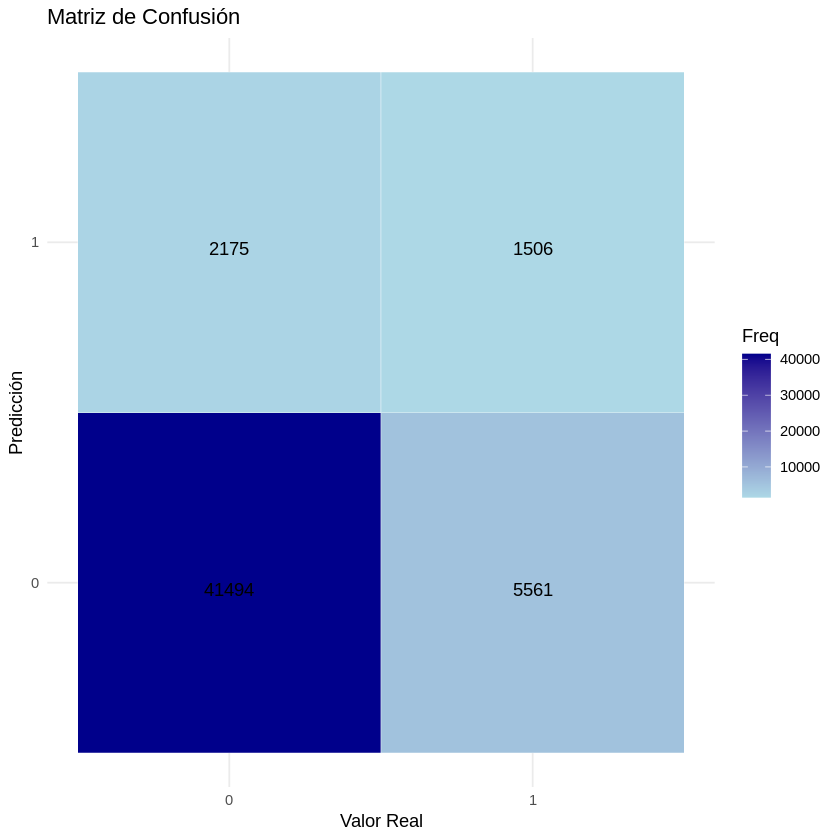

In [ ]:
conf_matrix_table <- as.data.frame(conf_matrix$table)

library(ggplot2)

ggplot(data = conf_matrix_table, aes(x = Reference, y = Prediction)) +
  geom_tile(aes(fill = Freq), color = "white") +
  scale_fill_gradient(low = "lightblue", high = "darkblue") +
  geom_text(aes(label = Freq), vjust = 1) +
  labs(title = "Matriz de Confusión", x = "Valor Real", y = "Predicción") +
  theme_minimal()

True Positive (TP): 1,506 (Predicción: 1, Valor Real: 1)

False Positive (FP): 2,175 (Predicción: 1, Valor Real: 0)

False Negative (FN): 5,561 (Predicción: 0, Valor Real: 1)

True Negative (TN): 41,494 (Predicción: 0, Valor Real: 0)

Total de prueba: 50,736. TP:2.96%. TN:81.78%.

- El modelo tiene una exactitud del 85.1%, lo que indica que el 85.1% de las predicciones son correctas. Esto parece ser bueno, pero depende del equilibrio de las clases en los datos.

- El modelo KNN en su configuración actual tiene un buen desempeño en términos de especificidad y exactitud, pero su precisión y sensibilidad son relativamente bajas. Esto sugiere que el modelo es mejor para predecir la ausencia de diabetes (negativos) que para predecir su presencia (positivos).

In [ ]:
d <-table(data$Diabetes_binary)

p <- prop.table(d)
p


       0        1 
0.860667 0.139333 

## **Parte 6. Regresión Lineal Múltiple**


Call:
lm(formula = data$Diabetes_binary ~ ., data = X)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.72930 -0.18457 -0.07701  0.02910  1.18518 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -1.004e+00  3.951e-02 -25.415  < 2e-16 ***
HighBP                7.325e-02  1.471e-03  49.812  < 2e-16 ***
HighChol              5.459e-02  1.381e-03  39.528  < 2e-16 ***
CholCheck             4.298e-02  3.373e-03  12.743  < 2e-16 ***
BMI                  -1.520e-03  4.741e-04  -3.205  0.00135 ** 
Smoker               -5.650e-03  1.323e-03  -4.270 1.96e-05 ***
Stroke                3.804e-02  3.315e-03  11.475  < 2e-16 ***
HeartDiseaseorAttack  6.776e-02  2.332e-03  29.063  < 2e-16 ***
PhysActivity         -6.637e-03  1.577e-03  -4.209 2.57e-05 ***
Fruits               -1.304e-03  1.378e-03  -0.946  0.34406    
Veggies              -2.731e-03  1.696e-03  -1.610  0.10743    
HvyAlcoholConsump    -4.979e-02  2.765e-03 -18.008  < 2e-

`geom_smooth()` using formula = 'y ~ x'


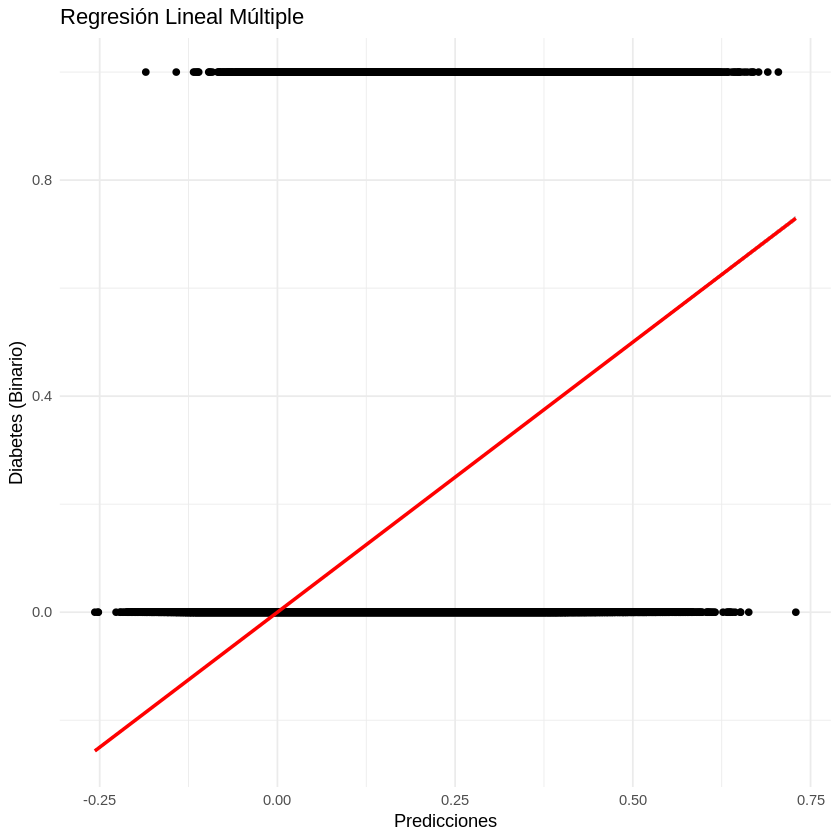

In [ ]:
y <- cdc_diabetes_health_indicators$data$targets
model_lm <- lm(data$Diabetes_binary ~ ., data = X)

summary(model_lm)

predictions <- predict(model_lm, X)

library(ggplot2)
ggplot(data = X, aes(x = predictions, y = data$Diabetes_binary)) +
  geom_point() +
  geom_smooth(method = "lm", col = "red") +
  labs(title = "Regresión Lineal Múltiple", x = "Predicciones", y = "Diabetes (Binario)") +
  theme_minimal()

- El modelo muestra que varias variables son significativamente predictoras de la diabetes, como HighBP, HighChol, GenHlth, Age, y log_BMI.

- El valor de R-squared es relativamente bajo (16.29%), indicando que el modelo no captura mucha variabilidad en la variable dependiente. Esto podría sugerir la necesidad de explorar otros modelos o variables adicionales.

- Los residuos indican que hay algunos valores extremos (outliers) con un mínimo de -0.72930 y un máximo de 1.18518.

## **Parte 6.1 Regresión Lineal Múltiple con una variable no binaria**

Debido a la deficiencia observada en el caso anterior, cambiamos el target para una mejor representación de las predicciones en un contexto lineal multivariable.


Call:
lm(formula = data$BMI ~ ., data = X)

Residuals:
    Min      1Q  Median      3Q     Max 
-20.832  -3.810  -0.809   2.758  73.179 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          28.362489   0.119785 236.777  < 2e-16 ***
HighBP                2.408683   0.028245  85.278  < 2e-16 ***
HighChol              0.642031   0.026909  23.859  < 2e-16 ***
CholCheck             0.615755   0.065881   9.347  < 2e-16 ***
Smoker               -0.419128   0.025840 -16.220  < 2e-16 ***
Stroke               -1.069518   0.064740 -16.520  < 2e-16 ***
HeartDiseaseorAttack -0.477636   0.045544 -10.487  < 2e-16 ***
PhysActivity         -1.105479   0.030731 -35.972  < 2e-16 ***
Fruits               -0.517434   0.026897 -19.237  < 2e-16 ***
Veggies              -0.038477   0.033139  -1.161   0.2456    
HvyAlcoholConsump    -1.199682   0.053955 -22.235  < 2e-16 ***
AnyHealthcare         0.058547   0.060102   0.974   0.3300    
NoDocbcCost           0.1014

`geom_smooth()` using formula = 'y ~ x'


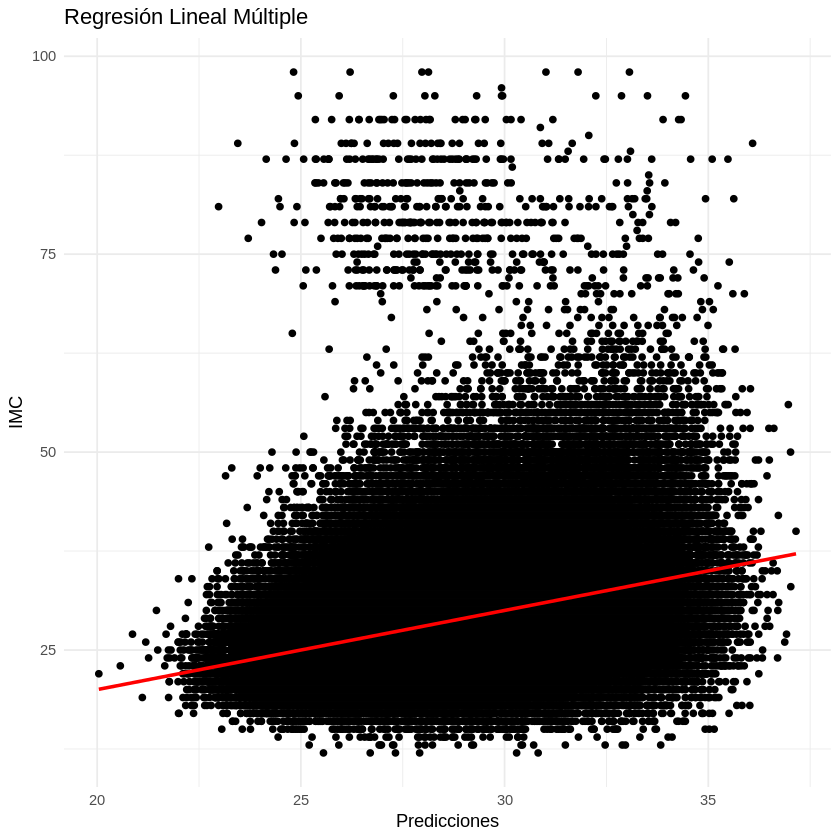

In [ ]:
y <- cdc_diabetes_health_indicators$data$targets
model_lm <- lm(data$BMI ~ ., data = X)

summary(model_lm)

predictions <- predict(model_lm, X)

library(ggplot2)
ggplot(data = X, aes(x = predictions, y = data$BMI)) +
  geom_point() +
  geom_smooth(method = "lm", col = "red") +
  labs(title = "Regresión Lineal Múltiple", x = "Predicciones", y = "IMC") +
  theme_minimal()

## **Parte 7. Regresión Logística**


Call:
glm(formula = data$Diabetes_binary ~ ., family = binomial, data = X)

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)          -7.8362269  0.0935514 -83.764  < 2e-16 ***
HighBP                0.7575653  0.0147580  51.332  < 2e-16 ***
HighChol              0.5785157  0.0135939  42.557  < 2e-16 ***
CholCheck             1.2439989  0.0685766  18.140  < 2e-16 ***
BMI                   0.0608673  0.0009004  67.599  < 2e-16 ***
Smoker               -0.0103902  0.0132025  -0.787 0.431291    
Stroke                0.1341797  0.0251011   5.346 9.01e-08 ***
HeartDiseaseorAttack  0.2204224  0.0178010  12.383  < 2e-16 ***
PhysActivity         -0.0518051  0.0144453  -3.586 0.000335 ***
Fruits               -0.0499323  0.0136914  -3.647 0.000265 ***
Veggies              -0.0331513  0.0159143  -2.083 0.037241 *  
HvyAlcoholConsump    -0.7691728  0.0385303 -19.963  < 2e-16 ***
AnyHealthcare         0.0826594  0.0334658   2.470 0.013512 *  
NoDocbcCost  

`geom_smooth()` using formula = 'y ~ x'


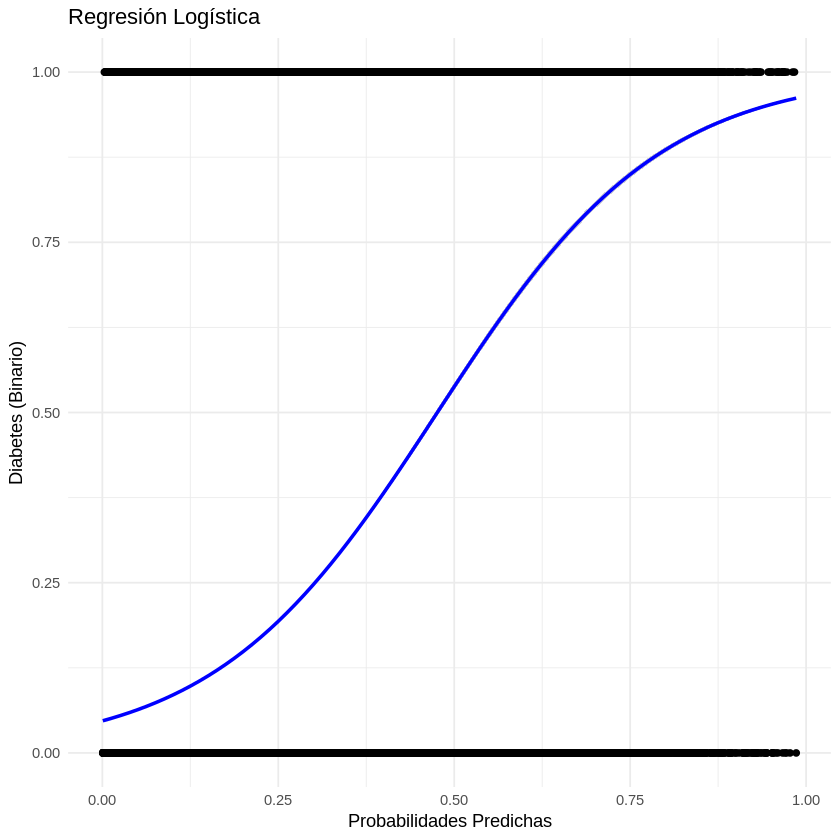

In [ ]:
model_glm <- glm(data$Diabetes_binary ~ ., data = X, family = binomial)

summary(model_glm)

pred_prob <- predict(model_glm, X, type = "response")

pred_class <- ifelse(pred_prob > 0.5, 1, 0)

ggplot(data = X, aes(x = pred_prob, y = data$Diabetes_binary)) +
  geom_point() +
  geom_smooth(method = "glm", method.args = list(family = "binomial"), col = "blue") +
  labs(title = "Regresión Logística", x = "Probabilidades Predichas", y = "Diabetes (Binario)") +
  theme_minimal()

- El modelo muestra que varias variables son significativamente predictoras de la diabetes, como HighBP, HighChol, GenHlth, Age, y `log_BMI

- Intercept: -24.02 (p < 2e-16) sugiere que, con todas las variables independientes en cero, el logaritmo de las odds de tener diabetes es muy bajo.

### **Representación en Matriz de Confusión**

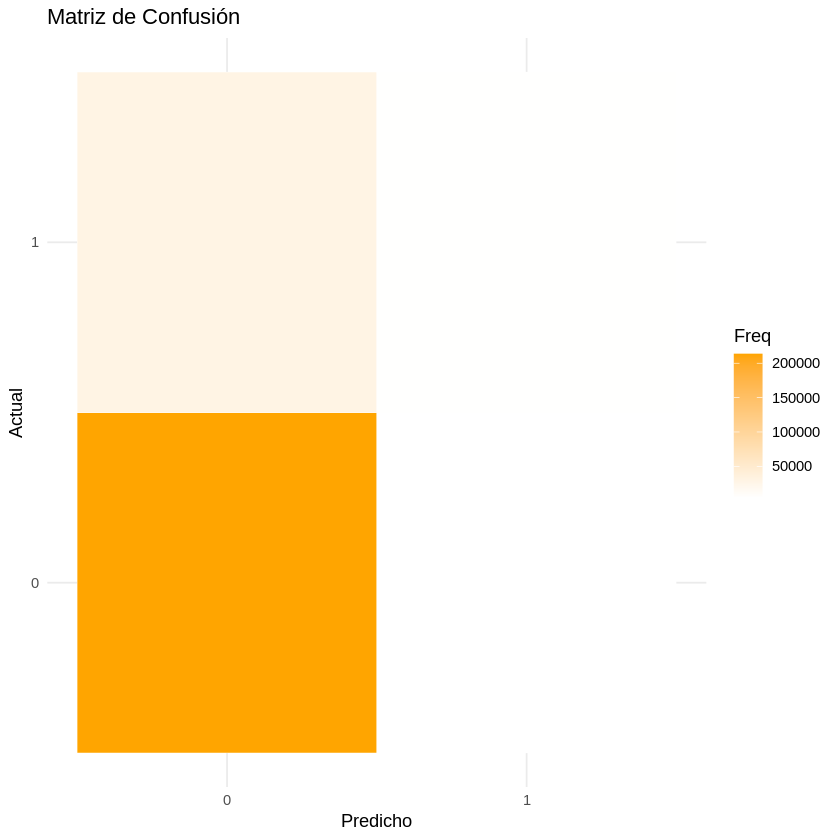

In [ ]:
pred_class <- ifelse(pred_prob > 0.5, 1, 0)

conf_matrix <- table(Predicted = pred_class, Actual = data$Diabetes_binary)

conf_df <- as.data.frame(conf_matrix)

ggplot(data = conf_df, aes(x = Predicted, y = Actual)) +
  geom_tile(aes(fill = Freq), color = "white") +
  scale_fill_gradient(low = "white", high = "orange") +
  labs(title = "Matriz de Confusión", x = "Predicho", y = "Actual") +
  theme_minimal()



La matriz representa los verdaderos negativos (0,0) y falsos positivos de forma proporcional.  Observamos que hay una mayor cantidad de predicciones correctas que las identificadas como incorrectas. Esto se confirma más adelante.

### **Representación en Curva ROC**

El análisis de curvas ROC (receiver operating characteristic curve) constituye un método estadístico para determinar la exactitud diagnóstica de estos tests, siendo utilizadas con tres propósitos específicos: determinar el punto de corte de una escala continua en el que se alcanza la sensibilidad y especificidad más alta, evaluar la capacidad discriminativa del test diagnóstico, es decir, su capacidad de diferenciar sujetos sanos versus enfermos, y comparar la capacidad discriminativa de dos o más tests diagnósticos que expresan sus resultados como escalas continuas.

Fuente: [Uso de curvas ROC en investigación clínica. Aspectos teórico-prácticos](https://www.scielo.cl/scielo.php?script=sci_arttext&pid=S0716-10182012000200003#:~:text=El%20an%C3%A1lisis%20de%20curvas%20ROC,la%20sensibilidad%20y%20especificidad%20m%C3%A1s)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’


Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.8221


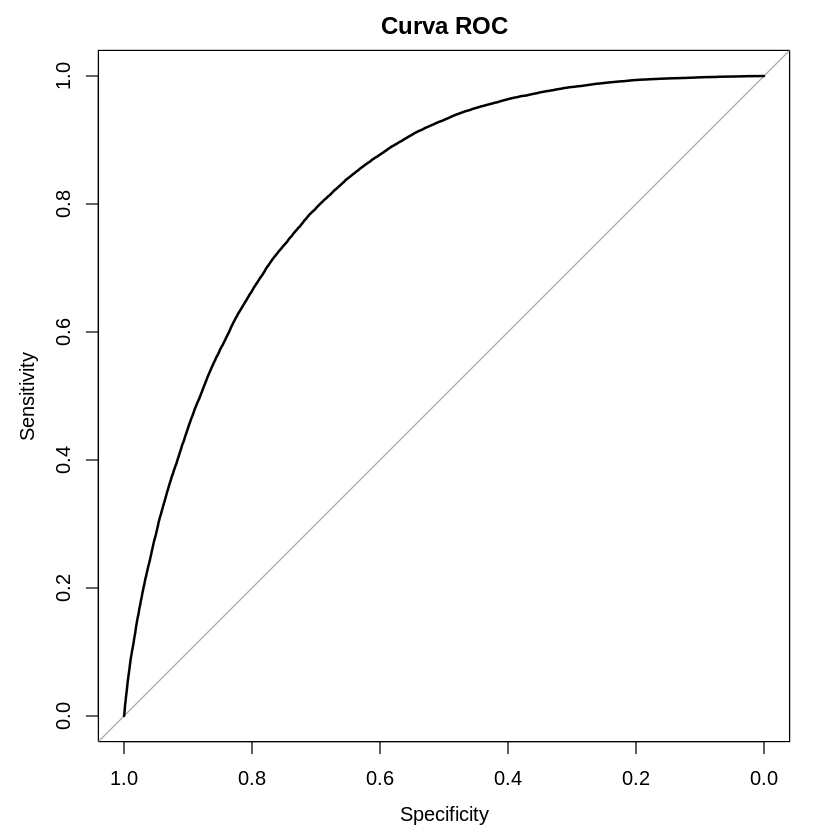

In [ ]:
install.packages("pROC")
library(pROC)
roc_curve <- roc(data$Diabetes_binary, pred_prob)
plot(roc_curve, main="Curva ROC")
print(auc(roc_curve))


- La curva se encuentra por encima de la línea diagonal, lo que indica que el clasificador funciona mejor que una simple adivinanza aleatoria. **El Área Bajo la Curva (AUC) es de 0.8221, lo que sugiere un buen nivel de discriminación entre el grupo de control y el grupo de casos**.

- Por lo tanto, el modelo de regresión logística tiene una buena capacidad para distinguir correctamente entre **pacientes con diabetes (casos)** y **sin diabetes (controles)**, con una alta tasa de verdaderos positivos y una baja tasa de falsos positivos.

## **Parte 7. Ridge y Lasso Adaptativo**

### **Regresión Ridge**

In [ ]:
install.packages("glmnet")
library(glmnet)

x <- model.matrix(Diabetes_binary ~ ., data)[, -1]
y <- data$Diabetes_binary

set.seed(1)

train <- sample(1:nrow(x), nrow(x) / 2)
test <- (-train)
y.test <- y[test]

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘RcppEigen’


Loading required package: Matrix

Loaded glmnet 4.1-8



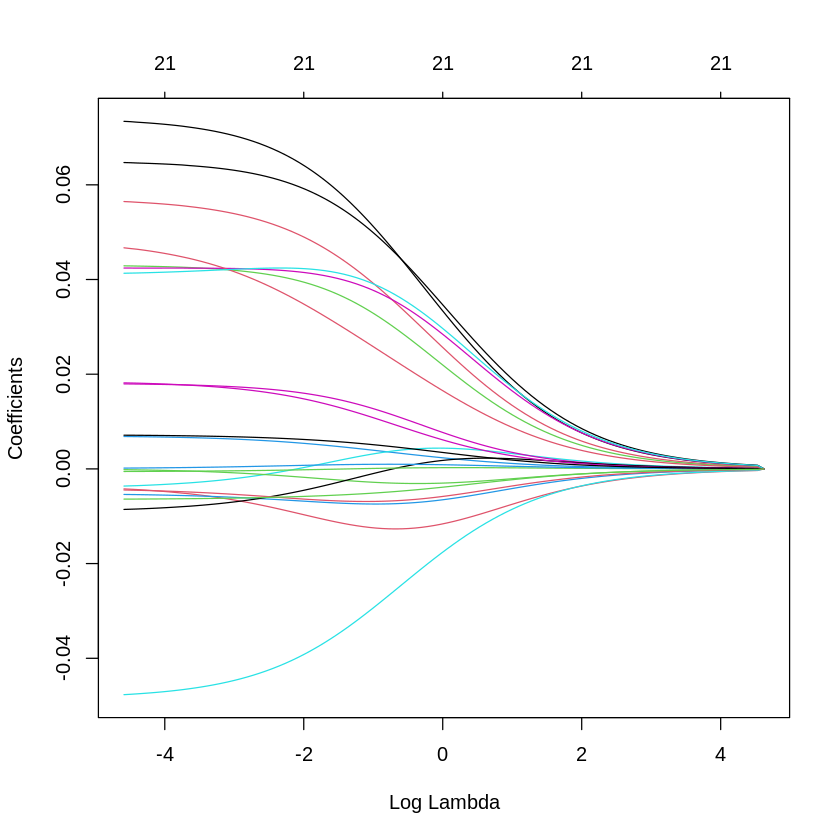

[1] 0.01018487

[1] 0.1004564

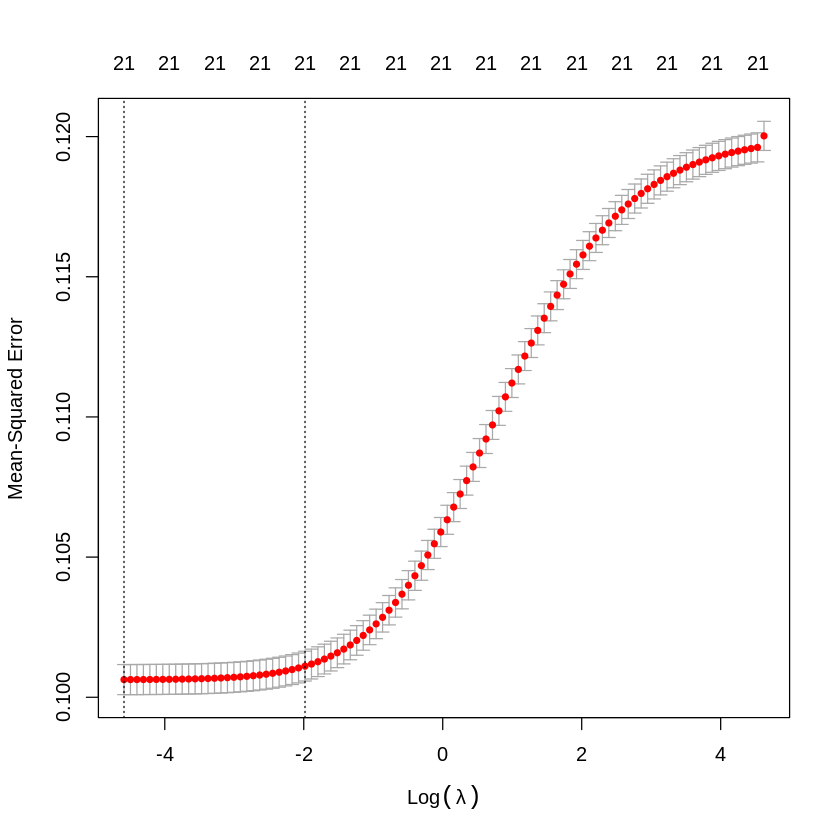

In [ ]:
ridge <- glmnet(x = x[train,], y = y[train], alpha = 0)
plot(ridge, xvar = "lambda")

# Ridge con validación cruzada de 10 pliegues
ridge_cv <- cv.glmnet(x = x[train,], y = y[train],
                      type.measure = "mse",
                      nfold = 10,
                      alpha = 0)

plot(ridge_cv)

bestlam <- ridge_cv$lambda.min
bestlam

ridge_pred <- predict(ridge_cv, s = bestlam, newx = x[test,])
mean((ridge_pred - y.test)^2)

# Estimar los coeficientes sin el intercept
ridge_coef <- as.numeric(coef(ridge_cv, s = bestlam))[-1]


Los valores de λ = 0.0101848719047659 y λ = 0.100456369521183 fueron identificados como los óptimos para minimizar el error de predicción sobre el diagnóstico de diabetes.

-  λ = 0.0101848719047659: La regularización no es tan severa. El modelo aún retiene buena parte de su flexibilidad para ajustar los datos, pero sin capturar demasiado ruido o variabilidad espuria.
- λ = 0.100456369521183: Regularización más fuerte en comparación con el valor anterior, pero aún relativamente moderado.

### **Lasso Adaptativo**

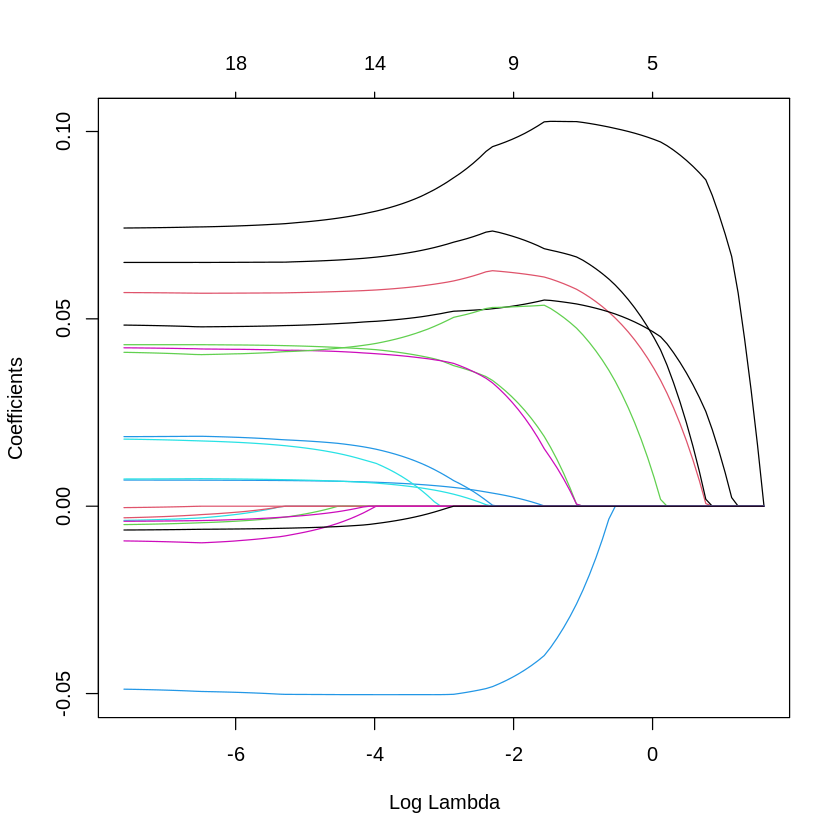

[1] 0.0002642999

[1] 0.1004552

(Intercept)               HighBP             HighChol 
       -0.2977484040         0.0752697988         0.0557178731 
           CholCheck                  BMI               Smoker 
        0.0425773926         0.0068565225        -0.0051343271 
              Stroke HeartDiseaseorAttack         PhysActivity 
        0.0365393018         0.0670771226        -0.0065341734 
              Fruits              Veggies    HvyAlcoholConsump 
       -0.0012552774        -0.0024937520        -0.0499978057 
       AnyHealthcare          NoDocbcCost              GenHlth 
        0.0140168250        -0.0064876271         0.0478292039 
            MentHlth             PhysHlth             DiffWalk 
       -0.0005568309         0.0000000000         0.0440698363 
                 Sex                  Age 
        0.0161978615         0.0072969456

(Intercept)               HighBP             HighChol 
       -0.2977484040         0.0752697988         0.0557178731 
           CholCheck                  BMI               Smoker 
        0.0425773926         0.0068565225        -0.0051343271 
              Stroke HeartDiseaseorAttack         PhysActivity 
        0.0365393018         0.0670771226        -0.0065341734 
              Fruits              Veggies    HvyAlcoholConsump 
       -0.0012552774        -0.0024937520        -0.0499978057 
       AnyHealthcare          NoDocbcCost              GenHlth 
        0.0140168250        -0.0064876271         0.0478292039 
            MentHlth             DiffWalk                  Sex 
       -0.0005568309         0.0440698363         0.0161978615 
                 Age 
        0.0072969456

[1] 19

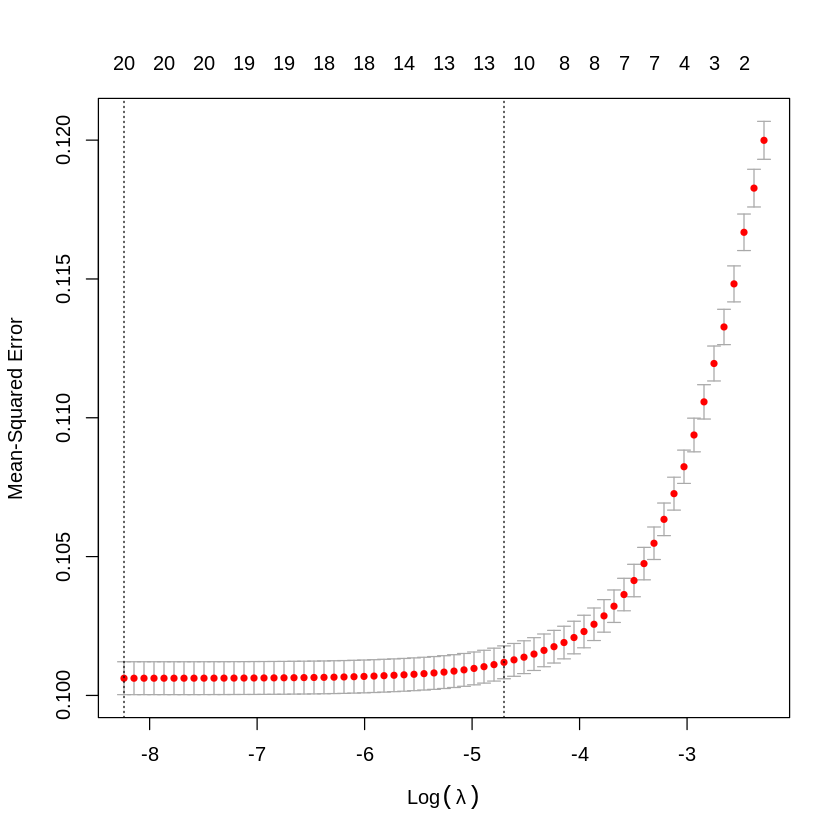

In [ ]:
alasso <- glmnet(x = x[train,], y = y[train],
                 alpha = 1,
                 penalty.factor = 1 / abs(ridge_coef))

plot(alasso, xvar = "lambda")

# Lasso adaptativo con validación cruzada de 10 pliegues
alasso_cv <- cv.glmnet(x = x[train,], y = y[train],
                       type.measure = "mse",
                       nfold = 10,
                       alpha = 1,
                       keep = TRUE)

plot(alasso_cv)

bestlam <- alasso_cv$lambda.min
bestlam

alasso_pred <- predict(alasso_cv, s = bestlam, newx = x[test,])
mean((alasso_pred - y.test)^2)

alasso_cv <- cv.glmnet(x = x, y = y,
                       type.measure = "mse",
                       nfold = 10,
                       alpha = 1,
                       keep = TRUE)

alasso_coef <- predict(alasso_cv, type = "coefficients",
                       s = bestlam)[1:20, ]

alasso_coef
alasso_coef[alasso_coef != 0]
length(alasso_coef[alasso_coef != 0])  # Incluye intercepto

- **HighBP, HighChol, CholCheck, y BMI** tienen coeficientes positivos, indicando que un aumento en estos valores incrementa la probabilidad del outcome Diabetes_binary.
- Coeficientes cercanos a cero o negativos como MentHlth, Fruits, PhysHlth indican **menor o nula importancia en la predicción del outcome**.

- λ = 0.000264299891828724: Quizás ajusta mucho a los datos de entrenamiento con un riesgo potencial de sobreajuste.

- λ = 0.10045515789396: Se ve como un mejor balance, ayudando a generalizar mejor a los datos no vistos, areduciendo tanto la varianza como el sesgo.

## **Conclusiones**

- Las variables relacionadas con la salud cardiovascular (hipertensión, colesterol alto, enfermedades cardíacas) son fuertes predictores de diabetes.

- El índice de masa corporal y la edad son factores importantes en ambos modelos.

- El consumo de alcohol en exceso parece tener una relación negativa con la probabilidad de diabetes en el modelo logístico.

El análisis del dataset de diabetes revela importantes factores de riesgo y correlaciones para la enfermedad.

- La regresión logística indica que la hipertensión, el colesterol alto, los chequeos de colesterol, la salud general y la edad son fuertes predictores de diabetes, mientras que un mayor índice de masa corporal (log_BMI) también incrementa la probabilidad.
- La regresión lineal refuerza estos hallazgos, destacando la relevancia de la salud cardiovascular en la determinación de la diabetes.
- El análisis de componentes principales sugiere que una cantidad significativa de la variabilidad en el dataset puede ser capturada por unos pocos componentes, lo que facilita la visualización y el modelado de los datos.


En conjunto, estos análisis proporcionan una visión completa de los factores de riesgo para la diabetes y subrayan la importancia de la salud cardiovascular, el control del peso y el estilo de vida saludable en la prevención de esta enfermedad. Estos hallazgos son cruciales para el desarrollo de estrategias de prevención y manejo clínico de la diabetes, y también sirven para identificar áreas potenciales de intervención y mejora en la atención médica.